aw2
# Case1

In [35]:
# library import
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [36]:
os.getcwd()

'C:\\Users\\jihun'

In [37]:
data=pd.read_excel('1921data2.xlsx')
data.head()


,매출액,욕망지표(구매의사),긍정확률,수량
0,3919600,0.010929,0.860302,4
1,2443600,0.023238,0.935579,8
2,2069600,0.011508,0.875293,5
3,1316000,0.006223,0.882879,10
4,1160000,0.020240,0.794134,0


In [38]:
# shape 파악
nCar = data.shape[0] # 데이터 개수
nVar = data.shape[1] # 변수 개수
print('nCar: %d' % nCar, 'nVar: %d' % nVar )

nCar: 351 nVar: 4


In [39]:
data.shape

(351, 4)

In [6]:
# 의미가 없다고 생각되는 변수 제거
data = data.drop(['id', 'date', 'zipcode', 'lat', 'long'], axis = 1) # id, date, zipcode, lat, long  제거

In [25]:
feature_columns=list(data.columns.difference(['매출액'])) # price-target, 그 외 feature
X = data[feature_columns]
y = data['매출액']
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 42) 
# train/test 비율을 7:3
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape) # 데이터 확인

(245, 3) (106, 3) (245,) (106,)


In [27]:
!pip install lightgbm

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [28]:
# lightgbm을 구현하여 shap value를 예측할 것
# ligthgbm 구현

# library
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10,
            'learning_rate': 0.01, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(test_x) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, test_y)))) # RMSE

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 148
[LightGBM] [Info] Number of data points in the train set: 245, number of used features: 3
[LightGBM] [Info] Start training from score 145770.612245
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning

In [29]:
!pip install shap

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [30]:
# shap value를 이용하여 각 변수의 영향도 파악

# !pip install shap (에러 발생시, skimage version 확인 (0.14.2 이상 권장))
# import skimage -> skimage.__version__ (skimage version 확인)
# skimage version upgrade -> !pip install --upgrade scikit-image

# shap value 
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(test_x) # Shap Values 계산

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passi

In [43]:
plt.rcParams['font.family'] = 'Malgun Gothic'

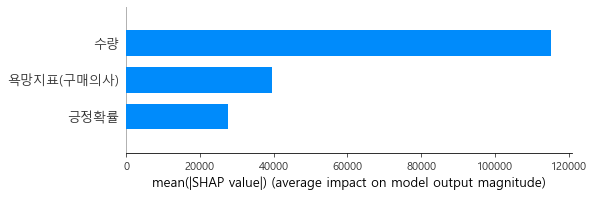

In [44]:
 # 각 변수에 대한 |Shap Values|을 통해 변수 importance 파악
shap.summary_plot(shap_values, test_x, plot_type = "bar")

# Case 2

scikit-learn의 load_cancer활용

In [45]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [46]:
data=pd.read_excel('1921data2.xlsx')
data.head()

,매출액,욕망지표(구매의사),긍정확률,수량
0,3919600,0.010929,0.860302,4
1,2443600,0.023238,0.935579,8
2,2069600,0.011508,0.875293,5
3,1316000,0.006223,0.882879,10
4,1160000,0.020240,0.794134,0


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   매출액         351 non-null    int64  
 1   욕망지표(구매의사)  351 non-null    float64
 2   긍정확률        351 non-null    float64
 3   수량          351 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 11.1 KB


In [49]:
# coding: utf-8
from sklearn.datasets import load_breast_cancer

from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import mglearn

import numpy as np









단일 트리의 결과와 마찬가지로 랜덤 포레스트도 "worst radius"특성이 중요하다고 보지만, 가장 많은 정보를 가진 특성으로는 "worst perimeter"를 선택했다.



랜덤 포레스트가 단일 트리보다 더 넓은 시각으로 데이터를 바라볼 수 있다.









<장단점과 매개변수>



회귀와 분류에 있어서 랜덤 포레스트는 현재 가장 널리 사용되는 머신러닝 알고리즘이다.



랜덤 포레스트는 성능이 매우 뛰어나고 매개변수 튜닝을 많이 하지 않아도 잘 작동하며, 데이터의 스케일을 맞출 필요도 없다.



기본적으로 랜덤 포레스트는 단일 트리의 단점을 보완하고 장점은 가지고 있다.



대량의 데이터셋에서 랜덤 포레스트 모델을 만들 때 다소 시간이 걸릴 수 있지만 CPU코어가 많다면 손쉽게 병렬 처리할 수있다.

n_jobs 매개변수를 이용하여 사용할 코어 수를 지정할  수 있다.

(n_jobs=-1로 지정하면 컴퓨터의 모든 코어를 사용한다.)





주의할점



랜덤 포레스트는 랜덤하기때문에 random_state를 다르제 지정하면 전혀 다른 모델이 만들어진다.

당연히 랜덤 포레스트의 트리가 많을수록 random_state값의 변화에 따른 변동이 적다.



랜덤 포레스트는 텍스트 데이터와 같이 매우 차원이 놓고 희소한 데이터에는 잘 작동하지 않는다.

이러한 데이터에는 선형 모델이 더 적합하다.

메모리를 많이 사용하기에 훈련과 예측이 느리다.



중요 매개변수는 n_estimators, max_features이고 max_depth 같은 사전 가지치기 옵션이 있다.

n_estimators는 클수록 좋다. 더 많은 트리를 평군하면 과대 적합을 줄여 안정적인 모델을 만둘 수 있다. (메모리와 훈련시간은 증가한다.)



max_features는 각 트리가 얼마나 무작위가 될지를 결정하며, 작은 max_features는 과대적합을 줄인다. 일반적으로는 기본값을 쓰면된다.

In [53]:
feature_columns=list(data.columns.difference(['매출액'])) # price-target, 그 외 feature
X = data[feature_columns]
y = data['매출액']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
forest = RandomForestClassifier(n_estimators=100)

In [54]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))

print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))


훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.000


In [57]:
print("특성 중요도 : \n{}".format(forest.feature_importances_))

특성 중요도 : 
[0.55122964 0.0749356  0.37383476]


In [64]:
data.shape

(351, 4)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   매출액         351 non-null    int64  
 1   욕망지표(구매의사)  351 non-null    float64
 2   긍정확률        351 non-null    float64
 3   수량          351 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 11.1 KB


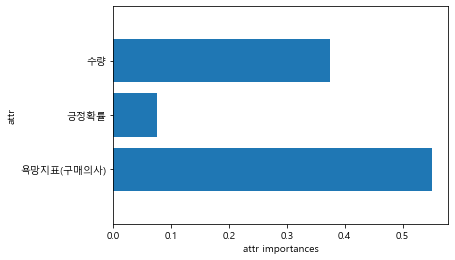

In [71]:
def plot_feature_importances_cancer(model):

    n_features = 3

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), data.columns[1:])

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

plt.show()



plot_feature_importances_cancer(forest)

# case 3

파이썬 머신러닝 완벽가이드 책 참조

XGBoost 이용

In [81]:
!pip install xgboost

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [82]:
import xgboost

print(xgboost.__version__)

1.4.2


In [84]:
data=pd.read_excel('1921data2.xlsx')
data.head()

,매출액,욕망지표(구매의사),긍정확률,수량
0,3919600,0.010929,0.860302,4
1,2443600,0.023238,0.935579,8
2,2069600,0.011508,0.875293,5
3,1316000,0.006223,0.882879,10
4,1160000,0.020240,0.794134,0


In [103]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [104]:
X = data[feature_columns]
y = data['매출액']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [105]:
print(X_train.shape , X_test.shape)

(280, 3) (71, 3)


In [106]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [115]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'reg:squarederror',
           'eval_metric':'logloss'   
        }
num_rounds = 400

In [116]:
# train 데이터 셋은 ‘train’ , evaluation(test) 데이터 셋은 ‘eval’ 로 명기합니다. 
wlist = [(dtrain,'train'),(dtest,'eval') ]


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   매출액         351 non-null    int64  
 1   욕망지표(구매의사)  351 non-null    float64
 2   긍정확률        351 non-null    float64
 3   수량          351 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 11.1 KB


In [118]:
# 하이퍼 파라미터와 early stopping 파라미터를 train( ) 함수의 파라미터로 전달
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds , \
                      early_stopping_rounds=100, evals=wlist )

[0]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[1]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[2]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[3]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[4]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[5]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[6]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[7]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[8]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[9]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[10]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[11]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[12]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[13]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[14]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[15]	train-logloss:-5409696.00000	eval-logloss:-4789807.00000
[16]	train-logloss

In [119]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨
[221561.27  239500.36   29261.094 398964.12  191720.23  108602.695
  80154.516  36725.074 230110.27  218126.66 ]
예측값 10개만 표시: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [152]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred,average='macro')
    recall = recall_score(y_test , pred,average='macro')
    f1 = f1_score(y_test,pred,average='macro')
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [153]:
get_clf_eval(y_test , preds, pred_probs)

ValueError: multi_class must be in ('ovo', 'ovr')

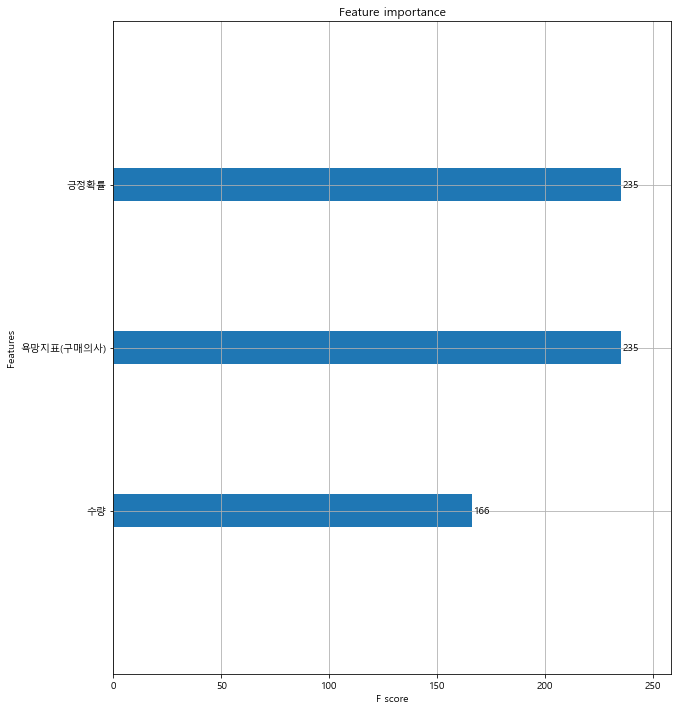

In [123]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)